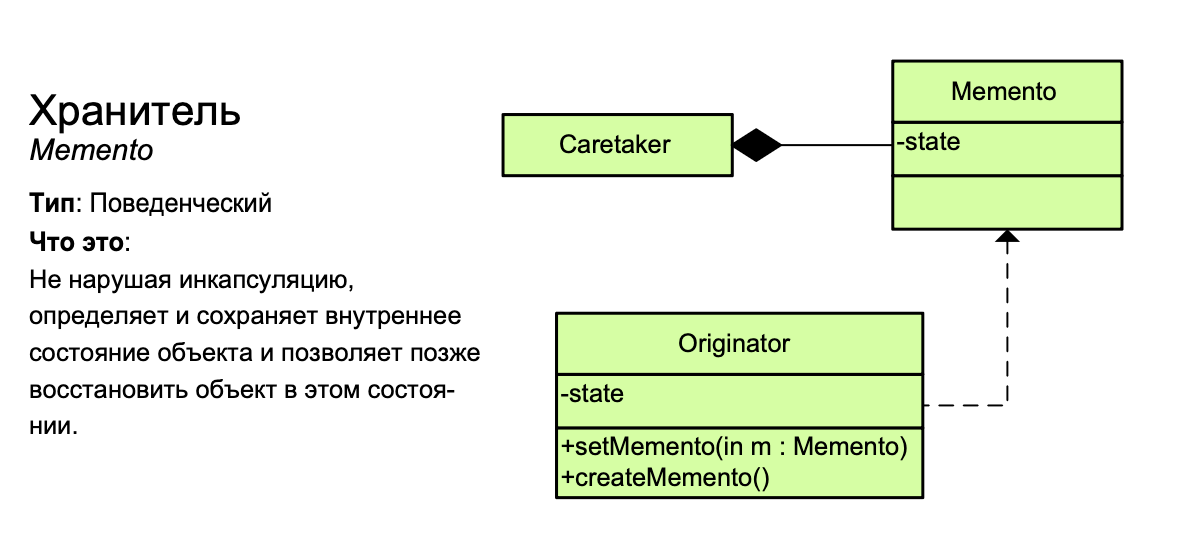

⸻

🔄 Что такое Memento?

Представь, ты пишешь свой “Блокнот”.
Ты ввёл текст: «Привет».
Потом добавил «, мир!».
Потом такой: «Блин, хочу откатиться назад».
Нажимаешь Ctrl+Z — и текст снова просто «Привет».

Вот как такое откатить назад?
Как сохранить то, что было, и потом вернуть, если что-то пошло не так?

📸 Это и есть паттерн Memento — способ сохранять состояние объекта, чтобы потом можно было вернуться назад.
Как «Сохранить игру перед боссом».

⸻

🧱 Из чего он состоит?

У нас три роли:

1. Originator — «Создатель»

Это твой объект. В нашем примере — Document.
Он умеет:
	•	📤 save() — сохранить своё состояние (в коробку).
	•	📥 restore(memento) — восстановить себя из коробки.

2. Memento — «Коробка»

Это просто хранилище. В нём лежит снимок состояния.
Он ничего не делает. Только хранит данные.

3. Caretaker — «Смотритель»

Он управляет коробками.
Думает за тебя: когда сохранить, когда откатить.
У него может быть стек: первая, вторая, третья версия…

⸻

👨‍💻 Простой пример на Python

class Document:
    def __init__(self):
        self.text = ""

    def write(self, text):
        self.text += text

    def save(self):  # создаёт снимок
        return Memento(self.text)

    def restore(self, memento):  # откат к сохранённому состоянию
        self.text = memento.text


class Memento:
    def __init__(self, text):
        self.text = text  # просто держим состояние


class History:
    def __init__(self):
        self.saves = []  # стек сохранений

    def push(self, memento):
        self.saves.append(memento)  # сохранить

    def pop(self):
        return self.saves.pop() if self.saves else None  # откат

Пример использования:

doc = Document()
history = History()

doc.write("Привет")
history.push(doc.save())  # сохраняем

doc.write(", мир!")  # добавили ещё
print(doc.text)  # Привет, мир!

doc.restore(history.pop())  # отменяем последнее
print(doc.text)  # Привет


⸻

🛠️ Когда тебе нужен Memento?
	•	📝 Когда нужна кнопка «назад» (Ctrl+Z).
	•	🕹️ Когда делаешь игру — сохранения перед боссом.
	•	📋 Когда заполняешь форму и хочешь сохранить черновик.
	•	🔒 Когда не хочешь лезть внутрь объекта, но нужно сохранить его состояние.

⸻

📸 Главное запомни:

Memento = Ctrl+Z в коде.
Ты просто делаешь “фотку состояния”, чтобы потом к ней вернуться.